In [1]:
import pandas as pd

# Cargar dataset
data = pd.read_csv("Fifa_WC_2022_Match_data.csv")

# Visualizar las primeras filas
print(data.head())

# Comprobar datos nulos o inconsistencias
print(data.info())

# Normalizar nombres de equipos
data['1'] = data['1'].str.upper().str.strip()
data['2'] = data['2'].str.upper().str.strip()

# Verificar equipos únicos
equipos = list(set(data['1']).union(set(data['2'])))
print(f"Equipos en el torneo: {equipos}")


   match_no day_of_week       date   hour                          venue  \
0         1         Sun  20-Nov-22  17:00                Al Bayt Stadium   
1         2         Mon  21-Nov-22  14:00  Khalifa International Stadium   
2         3         Mon  21-Nov-22  17:00             Al Thumama Stadium   
3         4         Mon  21-Nov-22  20:00          Ahmed bin Ali Stadium   
4         5         Tue  22-Nov-22  11:00          Lusail Iconic Stadium   

                         referee    group              1             2  \
0                 Daniele Orsato  Group A          QATAR       ECUADOR   
1                  Raphael Claus  Group B        ENGLAND          IRAN   
2                 Wilton Sampaio  Group A        SENEGAL   NETHERLANDS   
3  Abdulrahman Ibrahim Al Jassim  Group B  UNITED STATES         WALES   
4                  Slavko Vincic  Group C      ARGENTINA  SAUDI ARABIA   

   attendance  ...  1_panelties_scored  2_panelties_scored  1_goal_prevented  \
0       67372  ...

In [2]:
# Calcular métricas para equipo 1 (local)
local = data.groupby('1').agg({
    '1_goals': 'sum',      # Goles anotados
    '2_goals': 'sum',      # Goles recibidos
    '1_xg': 'mean',        # Promedio xG
    '1_poss': 'mean'       # Promedio de posesión
}).rename(columns={'1_goals': 'goals_for', '2_goals': 'goals_against', '1_xg': 'xg', '1_poss': 'possession'})

# Calcular métricas para equipo 2 (visitante)
visitante = data.groupby('2').agg({
    '2_goals': 'sum',
    '1_goals': 'sum',
    '2_xg': 'mean',
    '2_poss': 'mean'
}).rename(columns={'2_goals': 'goals_for', '1_goals': 'goals_against', '2_xg': 'xg', '2_poss': 'possession'})

# Combinar métricas
stats = local.add(visitante, fill_value=0)  # Suma métricas locales y visitantes
stats['matches'] = data['1'].value_counts() + data['2'].value_counts()  # Partidos jugados
stats['goals_for_per_match'] = stats['goals_for'] / stats['matches']
stats['goals_against_per_match'] = stats['goals_against'] / stats['matches']

print(stats)


                goals_for  goals_against        xg  possession  matches  \
1                                                                         
ARGENTINA              15              8  4.040000  110.200000        7   
AUSTRALIA               4              6  1.166667   71.666667        4   
BELGIUM                 1              2  1.400000  102.000000        3   
BRAZIL                  8              3  4.833333  112.833333        5   
CAMEROON                4              4  2.050000   87.000000        3   
CANADA                  2              7  2.100000   98.000000        3   
COSTA RICA              3             11  1.350000   63.000000        3   
CROATIA                 8              7  2.125000  112.416667        7   
DENMARK                 1              3  2.000000  120.500000        3   
ECUADOR                 4              3  3.050000  112.500000        3   
ENGLAND                13              4  3.975000  126.500000        5   
FRANCE                 16

In [3]:
# Probabilidad de ganar
stats['win_prob'] = stats['goals_for_per_match'] / (stats['goals_for_per_match'] + stats['goals_against_per_match'])

# Probabilidad de empatar (simplificada)
stats['draw_prob'] = 1 - stats['win_prob'] - (stats['goals_against_per_match'] / stats['matches'])

# Probabilidad de perder
stats['lose_prob'] = 1 - stats['win_prob'] - stats['draw_prob']

print(stats[['win_prob', 'draw_prob', 'lose_prob']])


                win_prob  draw_prob  lose_prob
1                                             
ARGENTINA       0.652174   0.184561   0.163265
AUSTRALIA       0.400000   0.225000   0.375000
BELGIUM         0.333333   0.444444   0.222222
BRAZIL          0.727273   0.152727   0.120000
CAMEROON        0.500000   0.055556   0.444444
CANADA          0.222222   0.000000   0.777778
COSTA RICA      0.214286  -0.436508   1.222222
CROATIA         0.533333   0.323810   0.142857
DENMARK         0.250000   0.416667   0.333333
ECUADOR         0.571429   0.095238   0.333333
ENGLAND         0.764706   0.075294   0.160000
FRANCE          0.666667   0.170068   0.163265
GERMANY         0.545455  -0.101010   0.555556
GHANA           0.416667  -0.194444   0.777778
IRAN            0.363636  -0.141414   0.777778
JAPAN           0.555556   0.194444   0.250000
KOREA REPUBLIC  0.384615   0.115385   0.500000
MEXICO          0.400000   0.266667   0.333333
MOROCCO         0.545455   0.352505   0.102041
NETHERLANDS  

In [4]:
# Probabilidad de anotar un gol en un minuto
stats['goal_per_minute'] = stats['xg'] / 90

stats


,goals_for,goals_against,xg,possession,matches,goals_for_per_match,goals_against_per_match,win_prob,draw_prob,lose_prob,goal_per_minute
1,,,,,,,,,,,
ARGENTINA,15,8,4.040000,110.200000,7,2.142857,1.142857,0.652174,0.184561,0.163265,0.044889
AUSTRALIA,4,6,1.166667,71.666667,4,1.000000,1.500000,0.400000,0.225000,0.375000,0.012963
BELGIUM,1,2,1.400000,102.000000,3,0.333333,0.666667,0.333333,0.444444,0.222222,0.015556
BRAZIL,8,3,4.833333,112.833333,5,1.600000,0.600000,0.727273,0.152727,0.120000,0.053704
CAMEROON,4,4,2.050000,87.000000,3,1.333333,1.333333,0.500000,0.055556,0.444444,0.022778
CANADA,2,7,2.100000,98.000000,3,0.666667,2.333333,0.222222,0.000000,0.777778,0.023333
COSTA RICA,3,11,1.350000,63.000000,3,1.000000,3.666667,0.214286,-0.436508,1.222222,0.015000
CROATIA,8,7,2.125000,112.416667,7,1.142857,1.000000,0.533333,0.323810,0.142857,0.023611
DENMARK,1,3,2.000000,120.500000,3,0.333333,1.000000,0.250000,0.416667,0.333333,0.022222


In [5]:
# import numpy as np

# # Lista de equipos
# equipos = list(stats.index)

# # Matriz de probabilidades
# transition_matrix = pd.DataFrame(index=equipos, columns=equipos, dtype=float)

# # Llenar la matriz con probabilidades de ganar (simplificado)
# for equipo1 in equipos:
#     for equipo2 in equipos:
#         if equipo1 != equipo2:
#             prob_ganar = stats.loc[equipo1, 'win_prob']
#             prob_perder = stats.loc[equipo2, 'win_prob']
#             prob_empatar = 1 - (prob_ganar + prob_perder)
#             transition_matrix.loc[equipo1, equipo2] = prob_ganar
#             transition_matrix.loc[equipo2, equipo1] = prob_perder
#             transition_matrix.loc[equipo1, equipo1] = prob_empatar

# print(transition_matrix)


In [64]:
import pandas as pd
import numpy as np

# Datos base
np.random.seed(7)

equipos = [
    'SPAIN', 'IRAN', 'MOROCCO',  'CANADA',
    'FRANCE', 'WALES','DENMARK', 'SERBIA', 
    'AUSTRALIA', 'GERMANY', 'UNITED STATES', 'SENEGAL', 
    'SAUDI ARABIA', 'MEXICO', 'JAPAN', 'COSTA RICA', 
    'BRAZIL', 'SWITZERLAND', 'GHANA', 'POLAND', 
    'NETHERLANDS', 'TUNISIA', 'PORTUGAL', 'ARGENTINA',
    'CROATIA', 'ENGLAND', 'QATAR', 'KOREA REPUBLIC', 
    'ECUADOR', 'BELGIUM', 'URUGUAY', 'CAMEROON'
]

grupos = ["A"] * 4 + ["B"] * 4 + ["C"] * 4 + ["D"] * 4 + ["E"] * 4 + ["F"] * 4 + ["G"] * 4 + ["H"] * 4
base = pd.DataFrame({"PAIS": equipos, "GRUPO": grupos})

class MarkovFootballSimulator:
    def __init__(self, equipos):
        self.equipos = equipos
        self.n_equipos = len(equipos)
        # Crear matriz de transición
        self.crear_matriz_transicion()
        
    def crear_matriz_transicion(self):
        """
        Crea una matriz de transición donde cada elemento (i,j) representa 
        la probabilidad de que el equipo i gane al equipo j
        """
        # Inicializar matriz con valores aleatorios
        self.matriz_transicion = np.random.rand(self.n_equipos, self.n_equipos)
        
        # Normalizar filas para que sumen 1
        self.matriz_transicion = self.matriz_transicion / self.matriz_transicion.sum(axis=1)[:, np.newaxis]
        
        # Ajustar diagonal principal a 0 (un equipo no juega contra sí mismo)
        np.fill_diagonal(self.matriz_transicion, 0)
        
        # Renormalizar
        self.matriz_transicion = self.matriz_transicion / self.matriz_transicion.sum(axis=1)[:, np.newaxis]
        
        # Crear diccionario para mapear equipos a índices
        self.equipo_a_indice = {equipo: i for i, equipo in enumerate(self.equipos)}
        
    def simular_enfrentamiento(self, equipo1, equipo2, eliminatorias=False):
        """
        Simula un enfrentamiento entre dos equipos usando la matriz de transición
        """
        idx1 = self.equipo_a_indice[equipo1]
        idx2 = self.equipo_a_indice[equipo2]
        
        # Probabilidades de transición para este par de equipos
        prob_ganar1 = self.matriz_transicion[idx1, idx2]
        prob_ganar2 = self.matriz_transicion[idx2, idx1]
        prob_empate = 1 - (prob_ganar1 + prob_ganar2)
        
        # Asegurar probabilidades válidas
        prob_ganar1 = max(0, prob_ganar1)
        prob_ganar2 = max(0, prob_ganar2)
        prob_empate = max(0, min(1 - (prob_ganar1 + prob_ganar2), 0.3))  # Limitar empates a 30%
        
        # Normalizar
        total = prob_ganar1 + prob_ganar2 + prob_empate
        prob_ganar1 /= total
        prob_ganar2 /= total
        prob_empate /= total
        
        resultado = np.random.choice(
            [equipo1, "empate", equipo2],
            p=[prob_ganar1, prob_empate, prob_ganar2]
        )
        
        if eliminatorias and resultado == "empate":
            # En eliminatorias, resolver empate usando probabilidades condicionales
            prob_pen1 = prob_ganar1 / (prob_ganar1 + prob_ganar2)
            prob_pen2 = prob_ganar2 / (prob_ganar1 + prob_ganar2)
            resultado = np.random.choice([equipo1, equipo2], p=[prob_pen1, prob_pen2])
            
        # Actualizar matriz de transición basado en el resultado
        self.actualizar_matriz_transicion(equipo1, equipo2, resultado)
        
        return resultado
    
    def actualizar_matriz_transicion(self, equipo1, equipo2, resultado):
        """
        Actualiza la matriz de transición basada en el resultado del partido
        """
        idx1 = self.equipo_a_indice[equipo1]
        idx2 = self.equipo_a_indice[equipo2]
        
        # Factor de actualización
        alpha = 0.1
        
        if resultado == equipo1:
            self.matriz_transicion[idx1, idx2] += alpha
            self.matriz_transicion[idx2, idx1] -= alpha
        elif resultado == equipo2:
            self.matriz_transicion[idx2, idx1] += alpha
            self.matriz_transicion[idx1, idx2] -= alpha
            
        # Asegurar que las probabilidades estén en [0,1]
        self.matriz_transicion = np.clip(self.matriz_transicion, 0, 1)
        
        # Renormalizar
        self.matriz_transicion = self.matriz_transicion / self.matriz_transicion.sum(axis=1)[:, np.newaxis]

def simular_mundial(base, n_simulaciones=1000):
    simulator = MarkovFootballSimulator(base['PAIS'].tolist())
    resultados = pd.DataFrame()
    np.random.shuffle(equipos)


    for _ in range(n_simulaciones):
        clasificados = {}
        
        # Fase de grupos
        for grupo_nombre in base['GRUPO'].unique():
            grupo = base[base['GRUPO'] == grupo_nombre].copy()
            grupo['PUNTOS'] = 0
            
            # Simular enfrentamientos del grupo
            for i, j in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
                equipo1, equipo2 = grupo.iloc[i]['PAIS'], grupo.iloc[j]['PAIS']
                resultado = simulator.simular_enfrentamiento(equipo1, equipo2)
                
                if resultado == equipo1:
                    grupo.loc[grupo['PAIS'] == equipo1, 'PUNTOS'] += 3
                elif resultado == equipo2:
                    grupo.loc[grupo['PAIS'] == equipo2, 'PUNTOS'] += 3
                else:  # Empate
                    grupo.loc[grupo['PAIS'] == equipo1, 'PUNTOS'] += 1
                    grupo.loc[grupo['PAIS'] == equipo2, 'PUNTOS'] += 1
            
            # Clasificar equipos
            grupo = grupo.sort_values(by='PUNTOS', ascending=False).reset_index(drop=True)
            clasificados[grupo_nombre + "1"] = grupo.iloc[0]['PAIS']
            clasificados[grupo_nombre + "2"] = grupo.iloc[1]['PAIS']
        
        # Fase eliminatoria
        octavos = [
            (clasificados["A1"], clasificados["B2"]),
            (clasificados["C1"], clasificados["D2"]),
            (clasificados["B1"], clasificados["A2"]),
            (clasificados["D1"], clasificados["C2"]),
        ]
        
        cuartos = [simulator.simular_enfrentamiento(a[0], a[1], eliminatorias=True) for a in octavos]
        semis = [
            simulator.simular_enfrentamiento(cuartos[0], cuartos[1], eliminatorias=True),
            simulator.simular_enfrentamiento(cuartos[2], cuartos[3], eliminatorias=True)
        ]
        final = simulator.simular_enfrentamiento(semis[0], semis[1], eliminatorias=True)
        
        # Guardar resultados
        resultados = pd.concat([resultados, pd.DataFrame([{
            "ganador": final,
            "finalista1": semis[0],
            "finalista2": semis[1],
            "cuarto11": cuartos[0],
            "cuarto12": cuartos[1],
            "cuarto21": cuartos[2],
            "cuarto22": cuartos[3]
        }])], ignore_index=True)
    
    return resultados

# Ejecutar simulación
resultados = simular_mundial(base)

# Analizar resultados
victorias = resultados.groupby('ganador').size().reset_index(name='victorias')
victorias['porcentaje_victoria'] = victorias['victorias'] / 1000
victorias = victorias.sort_values(by='porcentaje_victoria', ascending=False)
print("\nProbabilidades de victoria del mundial:")
print(victorias.head())


Probabilidades de victoria del mundial:
    ganador  victorias  porcentaje_victoria
7    MEXICO        184                0.184
6     JAPAN        149                0.149
11    SPAIN        134                0.134
13    WALES        115                0.115
3   DENMARK        100                0.100


In [65]:
# Mostrar resultados
print("Países que ganan más torneos:")
print(victorias.head(10))
print()
print("Resultados:")
print(resultados[['finalista1', 'finalista2', 'cuarto11', 'cuarto12', 'cuarto21', 'cuarto22']].head(10))


Países que ganan más torneos:
         ganador  victorias  porcentaje_victoria
7         MEXICO        184                0.184
6          JAPAN        149                0.149
11         SPAIN        134                0.134
13         WALES        115                0.115
3        DENMARK        100                0.100
1         CANADA         59                0.059
8   SAUDI ARABIA         58                0.058
4         FRANCE         54                0.054
0      AUSTRALIA         41                0.041
2     COSTA RICA         33                0.033

Resultados:
     finalista1    finalista2 cuarto11       cuarto12 cuarto21       cuarto22
0          IRAN       DENMARK     IRAN  UNITED STATES  DENMARK     COSTA RICA
1  SAUDI ARABIA         JAPAN   SERBIA   SAUDI ARABIA    SPAIN          JAPAN
2     AUSTRALIA         JAPAN    WALES      AUSTRALIA    SPAIN          JAPAN
3          IRAN         SPAIN     IRAN  UNITED STATES    SPAIN   SAUDI ARABIA
4     AUSTRALIA       DENMAR

C:\Users\rentt\AppData\Local\Temp\ipykernel_15332\951164166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=victorias.head(10),


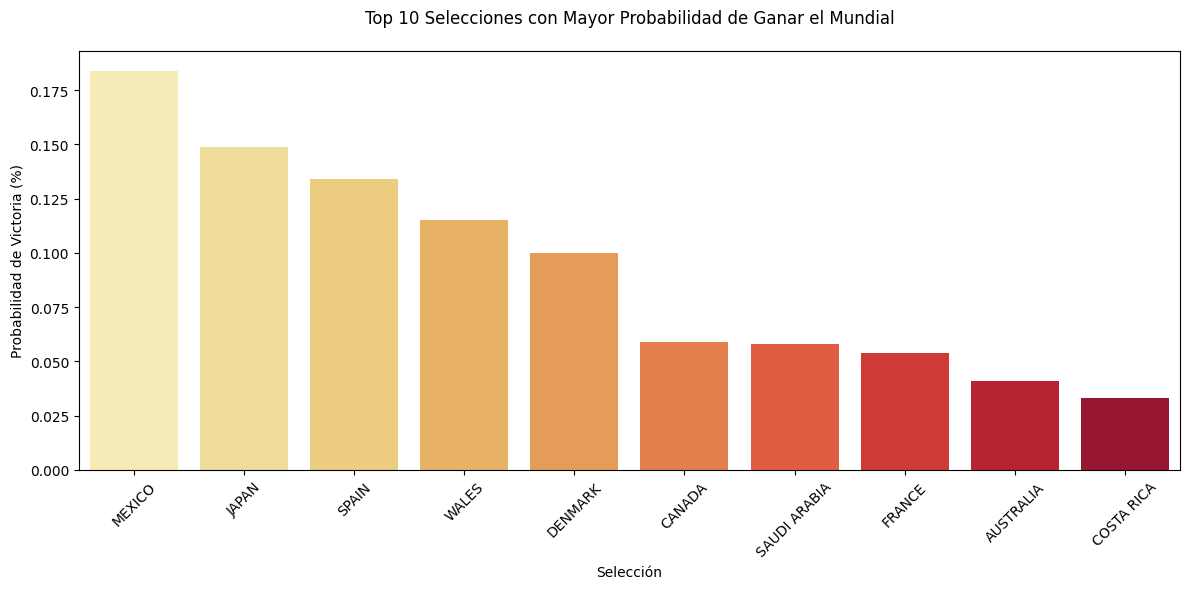

C:\Users\rentt\AppData\Local\Temp\ipykernel_15332\951164166.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=semifinalistas.head(10),


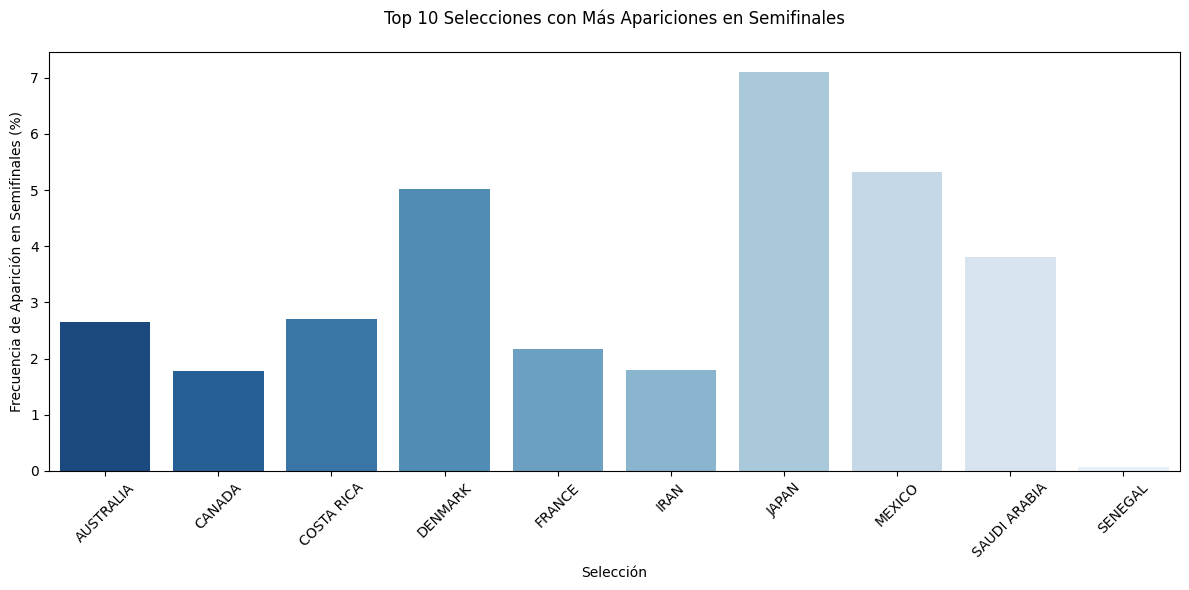

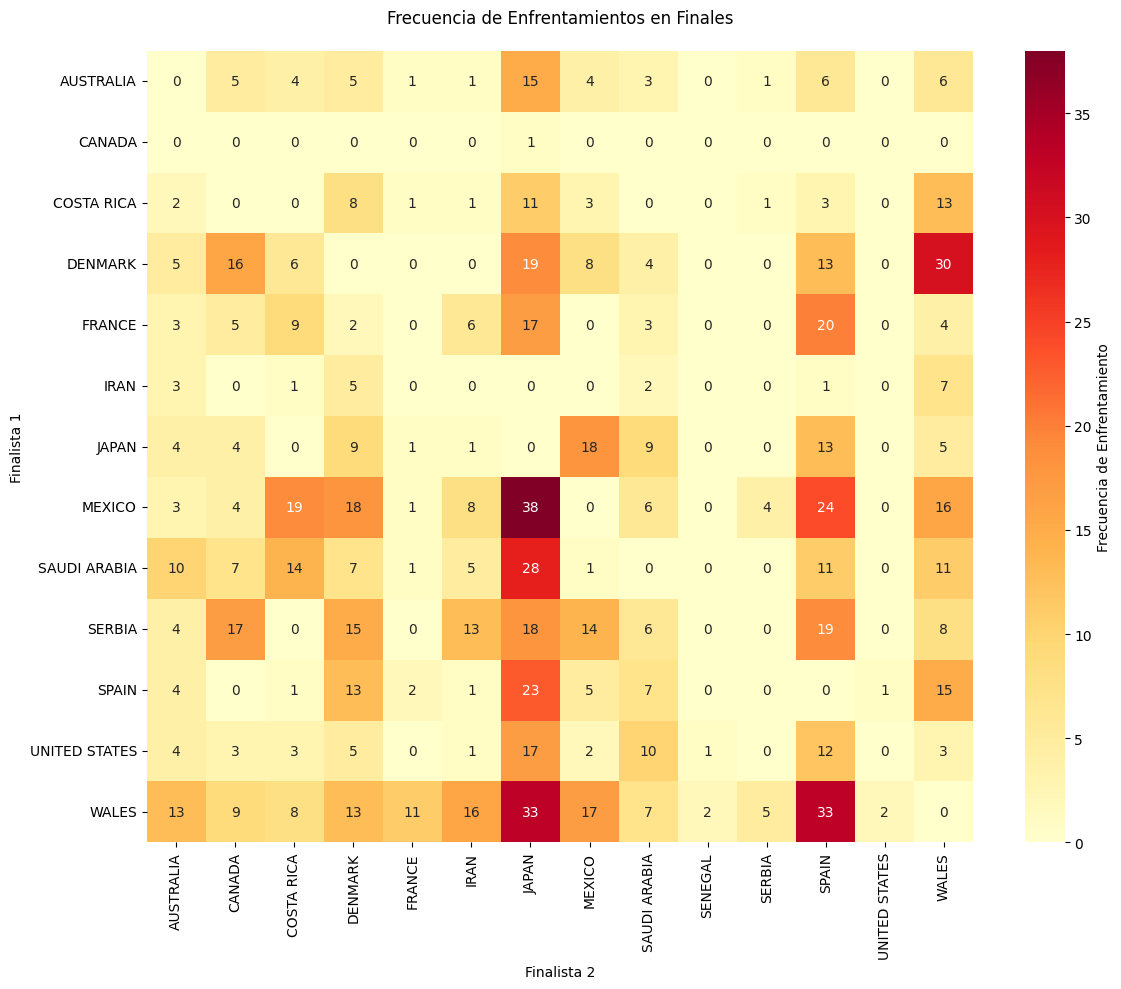

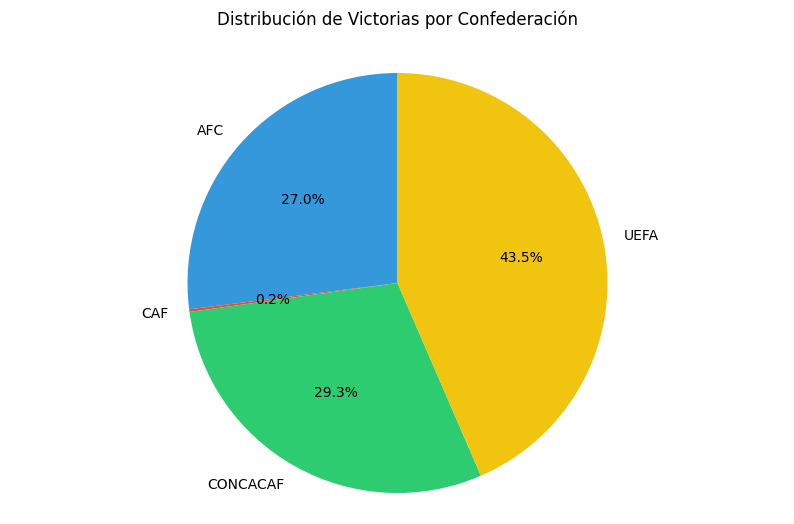

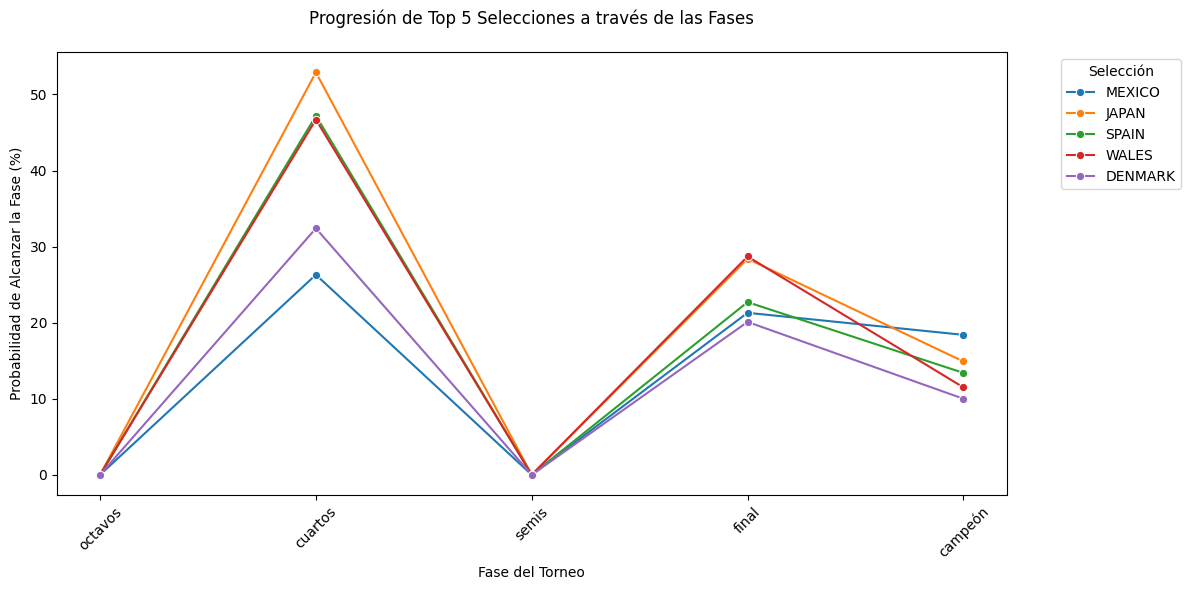

In [66]:
# Importar bibliotecas necesarias para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico de Probabilidades de Victoria
plt.figure(figsize=(12, 6))
sns.barplot(data=victorias.head(10), 
            x='ganador', 
            y='porcentaje_victoria', 
            palette='YlOrRd')
plt.title('Top 10 Selecciones con Mayor Probabilidad de Ganar el Mundial', pad=20)
plt.xlabel('Selección')
plt.ylabel('Probabilidad de Victoria (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Análisis de Semifinalistas
semifinalistas = pd.concat([
    resultados['finalista1'].value_counts(),
    resultados['finalista2'].value_counts()
]).reset_index()
semifinalistas = semifinalistas.groupby('index').sum().reset_index()
semifinalistas.columns = ['seleccion', 'apariciones']
semifinalistas['porcentaje'] = semifinalistas['apariciones'] / 40  # 4 semifinalistas * 1000 torneos

plt.figure(figsize=(12, 6))
sns.barplot(data=semifinalistas.head(10),
            x='seleccion',
            y='porcentaje',
            palette='Blues_r')
plt.title('Top 10 Selecciones con Más Apariciones en Semifinales', pad=20)
plt.xlabel('Selección')
plt.ylabel('Frecuencia de Aparición en Semifinales (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Heatmap de Finalistas
finalistas_matriz = pd.crosstab(resultados['finalista1'], resultados['finalista2'])
plt.figure(figsize=(12, 10))
sns.heatmap(finalistas_matriz,
            cmap='YlOrRd',
            annot=True,
            fmt='d',
            cbar_kws={'label': 'Frecuencia de Enfrentamiento'})
plt.title('Frecuencia de Enfrentamientos en Finales', pad=20)
plt.xlabel('Finalista 2')
plt.ylabel('Finalista 1')
plt.tight_layout()
plt.show()

# 4. Distribución de Victorias por Confederación
confederaciones = {
    'UEFA': ['SPAIN', 'FRANCE', 'DENMARK', 'SERBIA', 'GERMANY', 'WALES', 'SWITZERLAND', 'POLAND', 
             'NETHERLANDS', 'PORTUGAL', 'CROATIA', 'ENGLAND', 'BELGIUM'],
    'CONMEBOL': ['BRAZIL', 'ARGENTINA', 'URUGUAY', 'ECUADOR'],
    'CONCACAF': ['MEXICO', 'COSTA RICA', 'CANADA', 'UNITED STATES'],
    'AFC': ['IRAN', 'SAUDI ARABIA', 'JAPAN', 'QATAR', 'KOREA REPUBLIC', 'AUSTRALIA'],
    'CAF': ['MOROCCO', 'SENEGAL', 'GHANA', 'TUNISIA', 'CAMEROON']
}

def get_confederacion(pais):
    for conf, paises in confederaciones.items():
        if pais in paises:
            return conf
    return 'Otros'

victorias['confederacion'] = victorias['ganador'].apply(get_confederacion)
victorias_conf = victorias.groupby('confederacion')['victorias'].sum().reset_index()

plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6']
plt.pie(victorias_conf['victorias'], 
        labels=victorias_conf['confederacion'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
plt.title('Distribución de Victorias por Confederación', pad=20)
plt.axis('equal')
plt.show()

# 5. Progresión de Equipos por Fases
fases = ['octavos', 'cuartos', 'semis', 'final', 'campeón']
top_5 = victorias.head()['ganador'].tolist()
progresion_data = []

for equipo in top_5:
    octavos_count = sum([len(resultados[col][resultados[col] == equipo]) for col in resultados.columns if 'octavo' in col])
    cuartos_count = sum([len(resultados[col][resultados[col] == equipo]) for col in resultados.columns if 'cuarto' in col])
    semis_count = sum([len(resultados[col][resultados[col] == equipo]) for col in resultados.columns if 'semi' in col])
    final_count = len(resultados[resultados['finalista1'] == equipo]) + len(resultados[resultados['finalista2'] == equipo])
    campeon_count = len(resultados[resultados['ganador'] == equipo])
    
    progresion_data.append({
        'equipo': equipo,
        'octavos': octavos_count / 1000 * 100,
        'cuartos': cuartos_count / 1000 * 100,
        'semis': semis_count / 1000 * 100,
        'final': final_count / 1000 * 100,
        'campeón': campeon_count / 1000 * 100
    })

progresion_df = pd.DataFrame(progresion_data)
progresion_df_melted = pd.melt(progresion_df, 
                                 id_vars=['equipo'], 
                                 value_vars=['octavos', 'cuartos', 'semis', 'final', 'campeón'],
                                 var_name='fase',
                                 value_name='porcentaje')

plt.figure(figsize=(12, 6))
sns.lineplot(data=progresion_df_melted,
             x='fase',
             y='porcentaje',
             hue='equipo',
             marker='o')
plt.title('Progresión de Top 5 Selecciones a través de las Fases', pad=20)
plt.xlabel('Fase del Torneo')
plt.ylabel('Probabilidad de Alcanzar la Fase (%)')
plt.xticks(rotation=45)
plt.legend(title='Selección', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

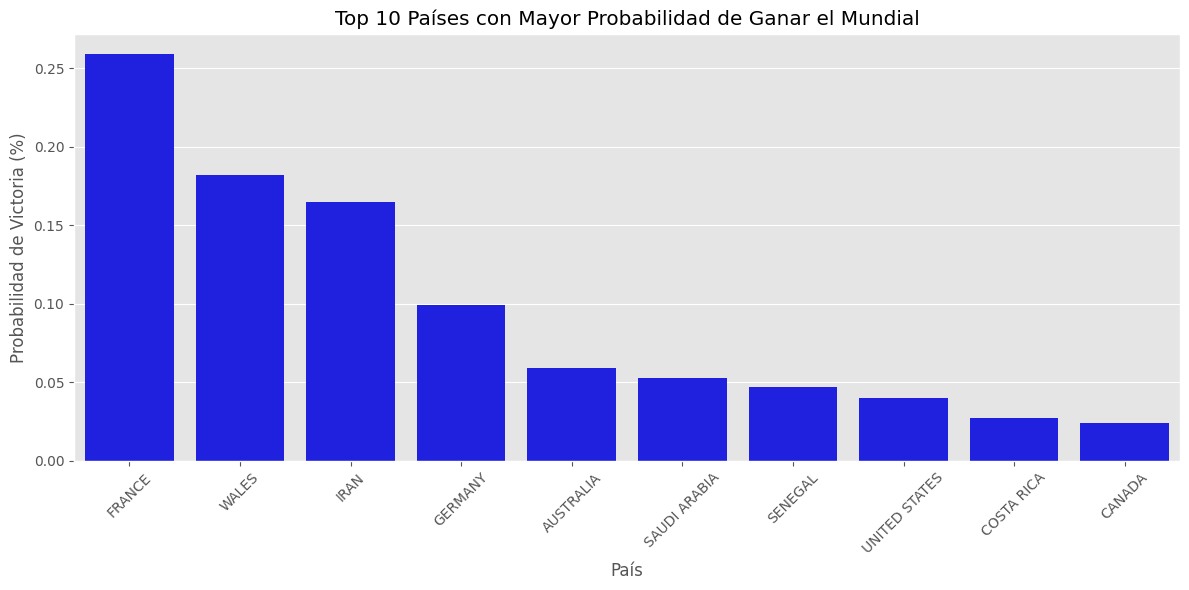

In [11]:
# Importar bibliotecas necesarias para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
plt.style.use('ggplot')
sns.set_palette("husl")

# 1. Gráfico de Campeones del Mundial
plt.figure(figsize=(12, 6))
sns.barplot(data=victorias.head(10), x='ganador', y='porcentaje_victoria', color='blue')
plt.title('Top 10 Países con Mayor Probabilidad de Ganar el Mundial')
plt.xlabel('País')
plt.ylabel('Probabilidad de Victoria (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

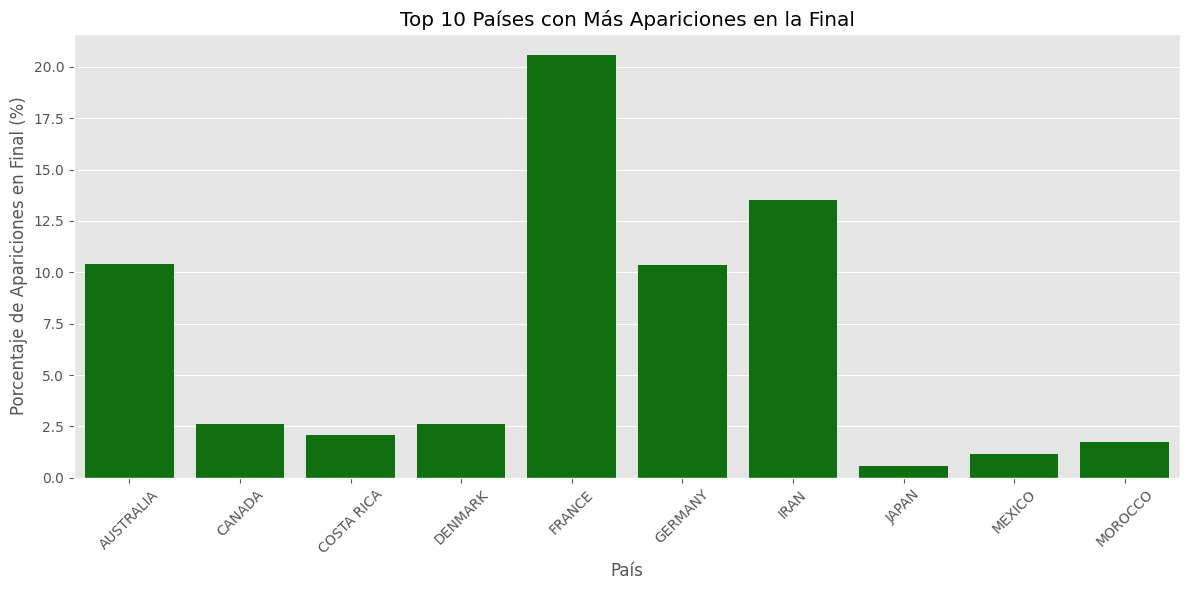

In [12]:
# 2. Análisis de Finalistas
finalistas_total = pd.concat([
    resultados['finalista1'].value_counts(),
    resultados['finalista2'].value_counts()
]).reset_index()
finalistas_total = finalistas_total.groupby('index').sum().reset_index()
finalistas_total.columns = ['pais', 'apariciones_final']
finalistas_total['porcentaje_final'] = finalistas_total['apariciones_final'] / 20  # 2 finalistas * 1000 torneos

plt.figure(figsize=(12, 6))
sns.barplot(data=finalistas_total.head(10), x='pais', y='porcentaje_final', color='green')
plt.title('Top 10 Países con Más Apariciones en la Final')
plt.xlabel('País')
plt.ylabel('Porcentaje de Apariciones en Final (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

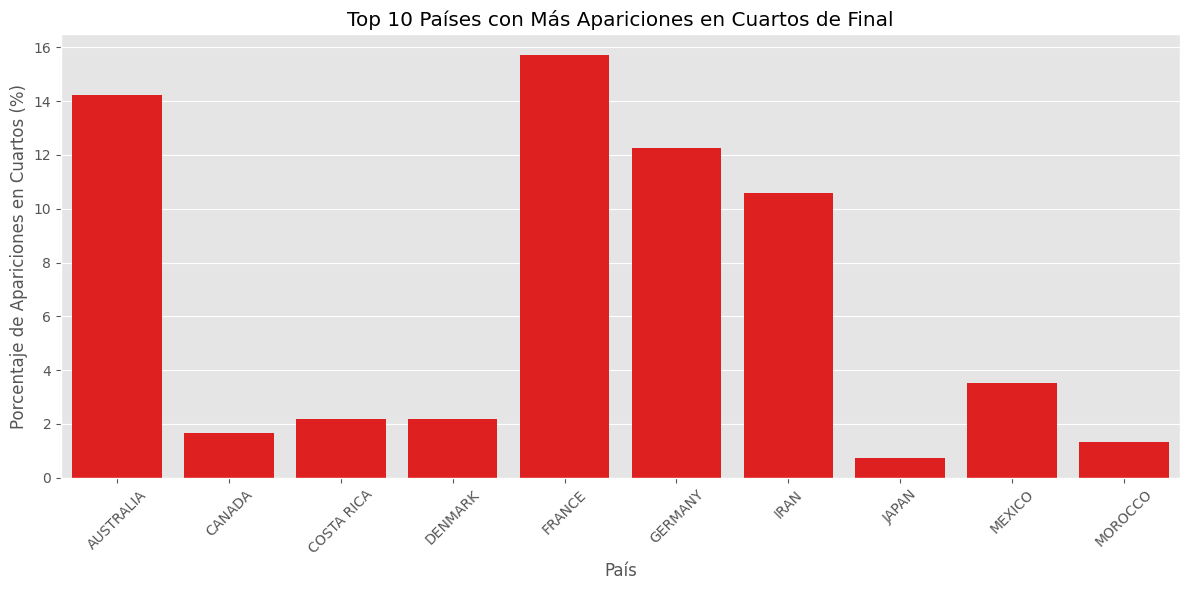

In [ ]:
# 3. Análisis de Semifinalistas (Cuartos)
cuartos_total = pd.concat([
    resultados['cuarto11'].value_counts(),
    resultados['cuarto12'].value_counts(),
    resultados['cuarto21'].value_counts(),
    resultados['cuarto22'].value_counts()
]).reset_index()
cuartos_total = cuartos_total.groupby('index').sum().reset_index()
cuartos_total.columns = ['pais', 'apariciones_cuartos']
cuartos_total['porcentaje_cuartos'] = cuartos_total['apariciones_cuartos'] / 40  # 4 equipos * 1000 torneos
n
plt.figure(figsize=(12, 6))
sns.barplot(data=cuartos_total.head(10), x='pais', y='porcentaje_cuartos', color='red')
plt.title('Top 10 Países con Más Apariciones en Cuartos de Final')
plt.xlabel('País')
plt.ylabel('Porcentaje de Apariciones en Cuartos (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# 5. Gráfico de violín para distribución de victorias
plt.figure(figsize=(15, 6))
victorias_melt = pd.melt(resultados[['ganador']])
sns.violinplot(data=victorias_melt, x='ganador', color='purple')
plt.title('Distribución de Victorias por País')
plt.xlabel('País')
plt.ylabel('Densidad de Victorias')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `ganador` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x600 with 0 Axes>

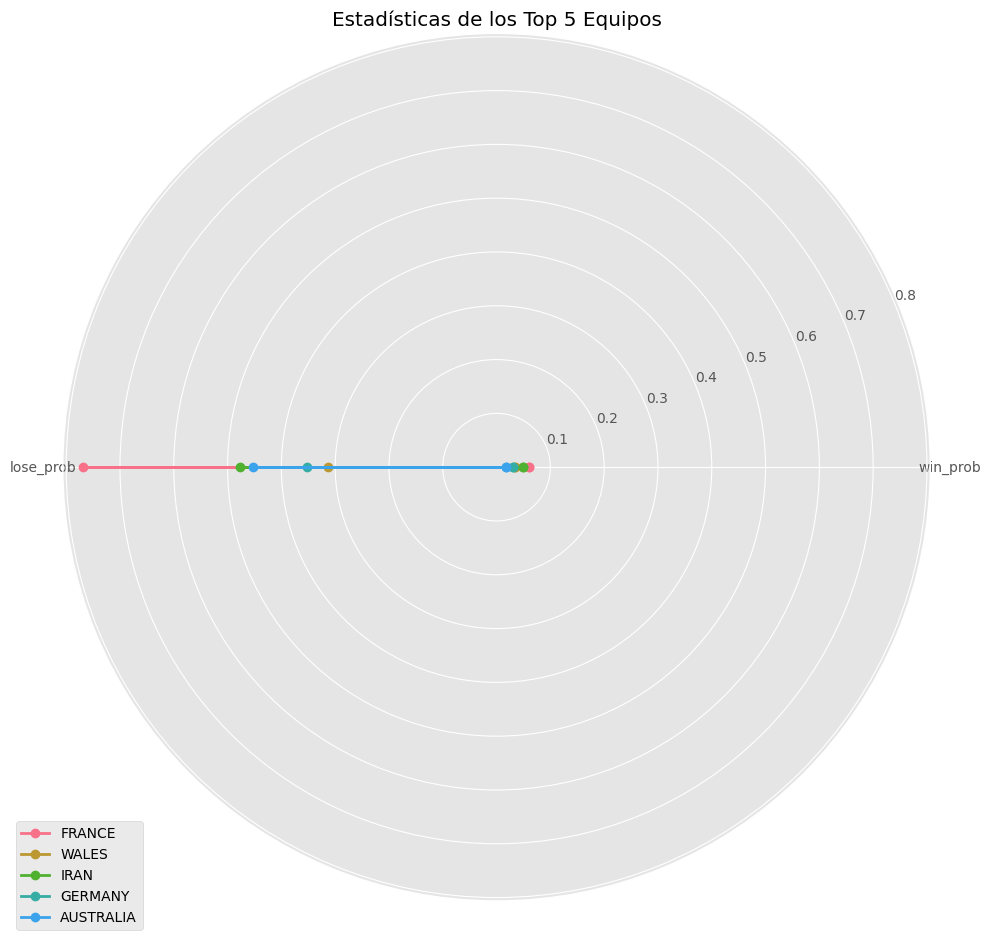

In [20]:
# 6. Radar Chart para los Top 5 equipos
top_5_equipos = victorias.head(5)['ganador'].tolist()
stats_top5 = stats.loc[top_5_equipos]

# Crear el gráfico de radar
angles = np.linspace(0, 2*np.pi, len(stats_top5.columns), endpoint=False)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for idx, equipo in enumerate(top_5_equipos):
    valores = stats_top5.loc[equipo].values
    valores = np.concatenate((valores, [valores[0]]))  # Cerrar el polígono
    angles_plot = np.concatenate((angles, [angles[0]]))  # Cerrar el polígono
    ax.plot(angles_plot, valores, 'o-', linewidth=2, label=equipo)
    ax.fill(angles_plot, valores, alpha=0.25)

ax.set_xticks(angles)
ax.set_xticklabels(stats_top5.columns)
ax.set_title('Estadísticas de los Top 5 Equipos')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()